# Desafio Python

## Etapa 1

### Importação das bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

### Leitura do dataset e remoção de linhas duplicadas

In [3]:
df = pd.read_csv('googleplaystore.csv')
df = df.drop_duplicates()

### 5 aplicativos com maior número de instalações

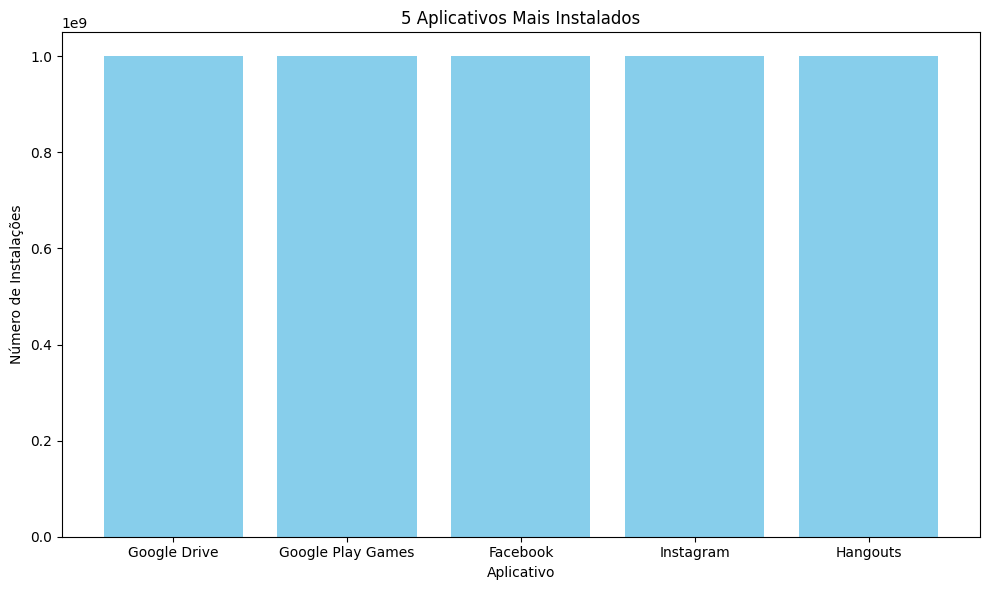

In [4]:
df['Installs'] = df['Installs'].astype(str).str.replace(',', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df_sem_duplicados = df.sort_values(by='Installs', ascending=False).drop_duplicates(subset='App', keep='first')

cinco_apps_mais_instalados = df_sem_duplicados.head(5)

plt.figure(figsize=(10,6))
plt.bar(cinco_apps_mais_instalados['App'], cinco_apps_mais_instalados['Installs'], color='skyblue')

plt.title('5 Aplicativos Mais Instalados')
plt.xlabel('Aplicativo')
plt.ylabel('Número de Instalações')

plt.tight_layout()
plt.show()


## Etapa 2

### Gráfico de pizza com as categorias de apps e frequência de ocorrência.

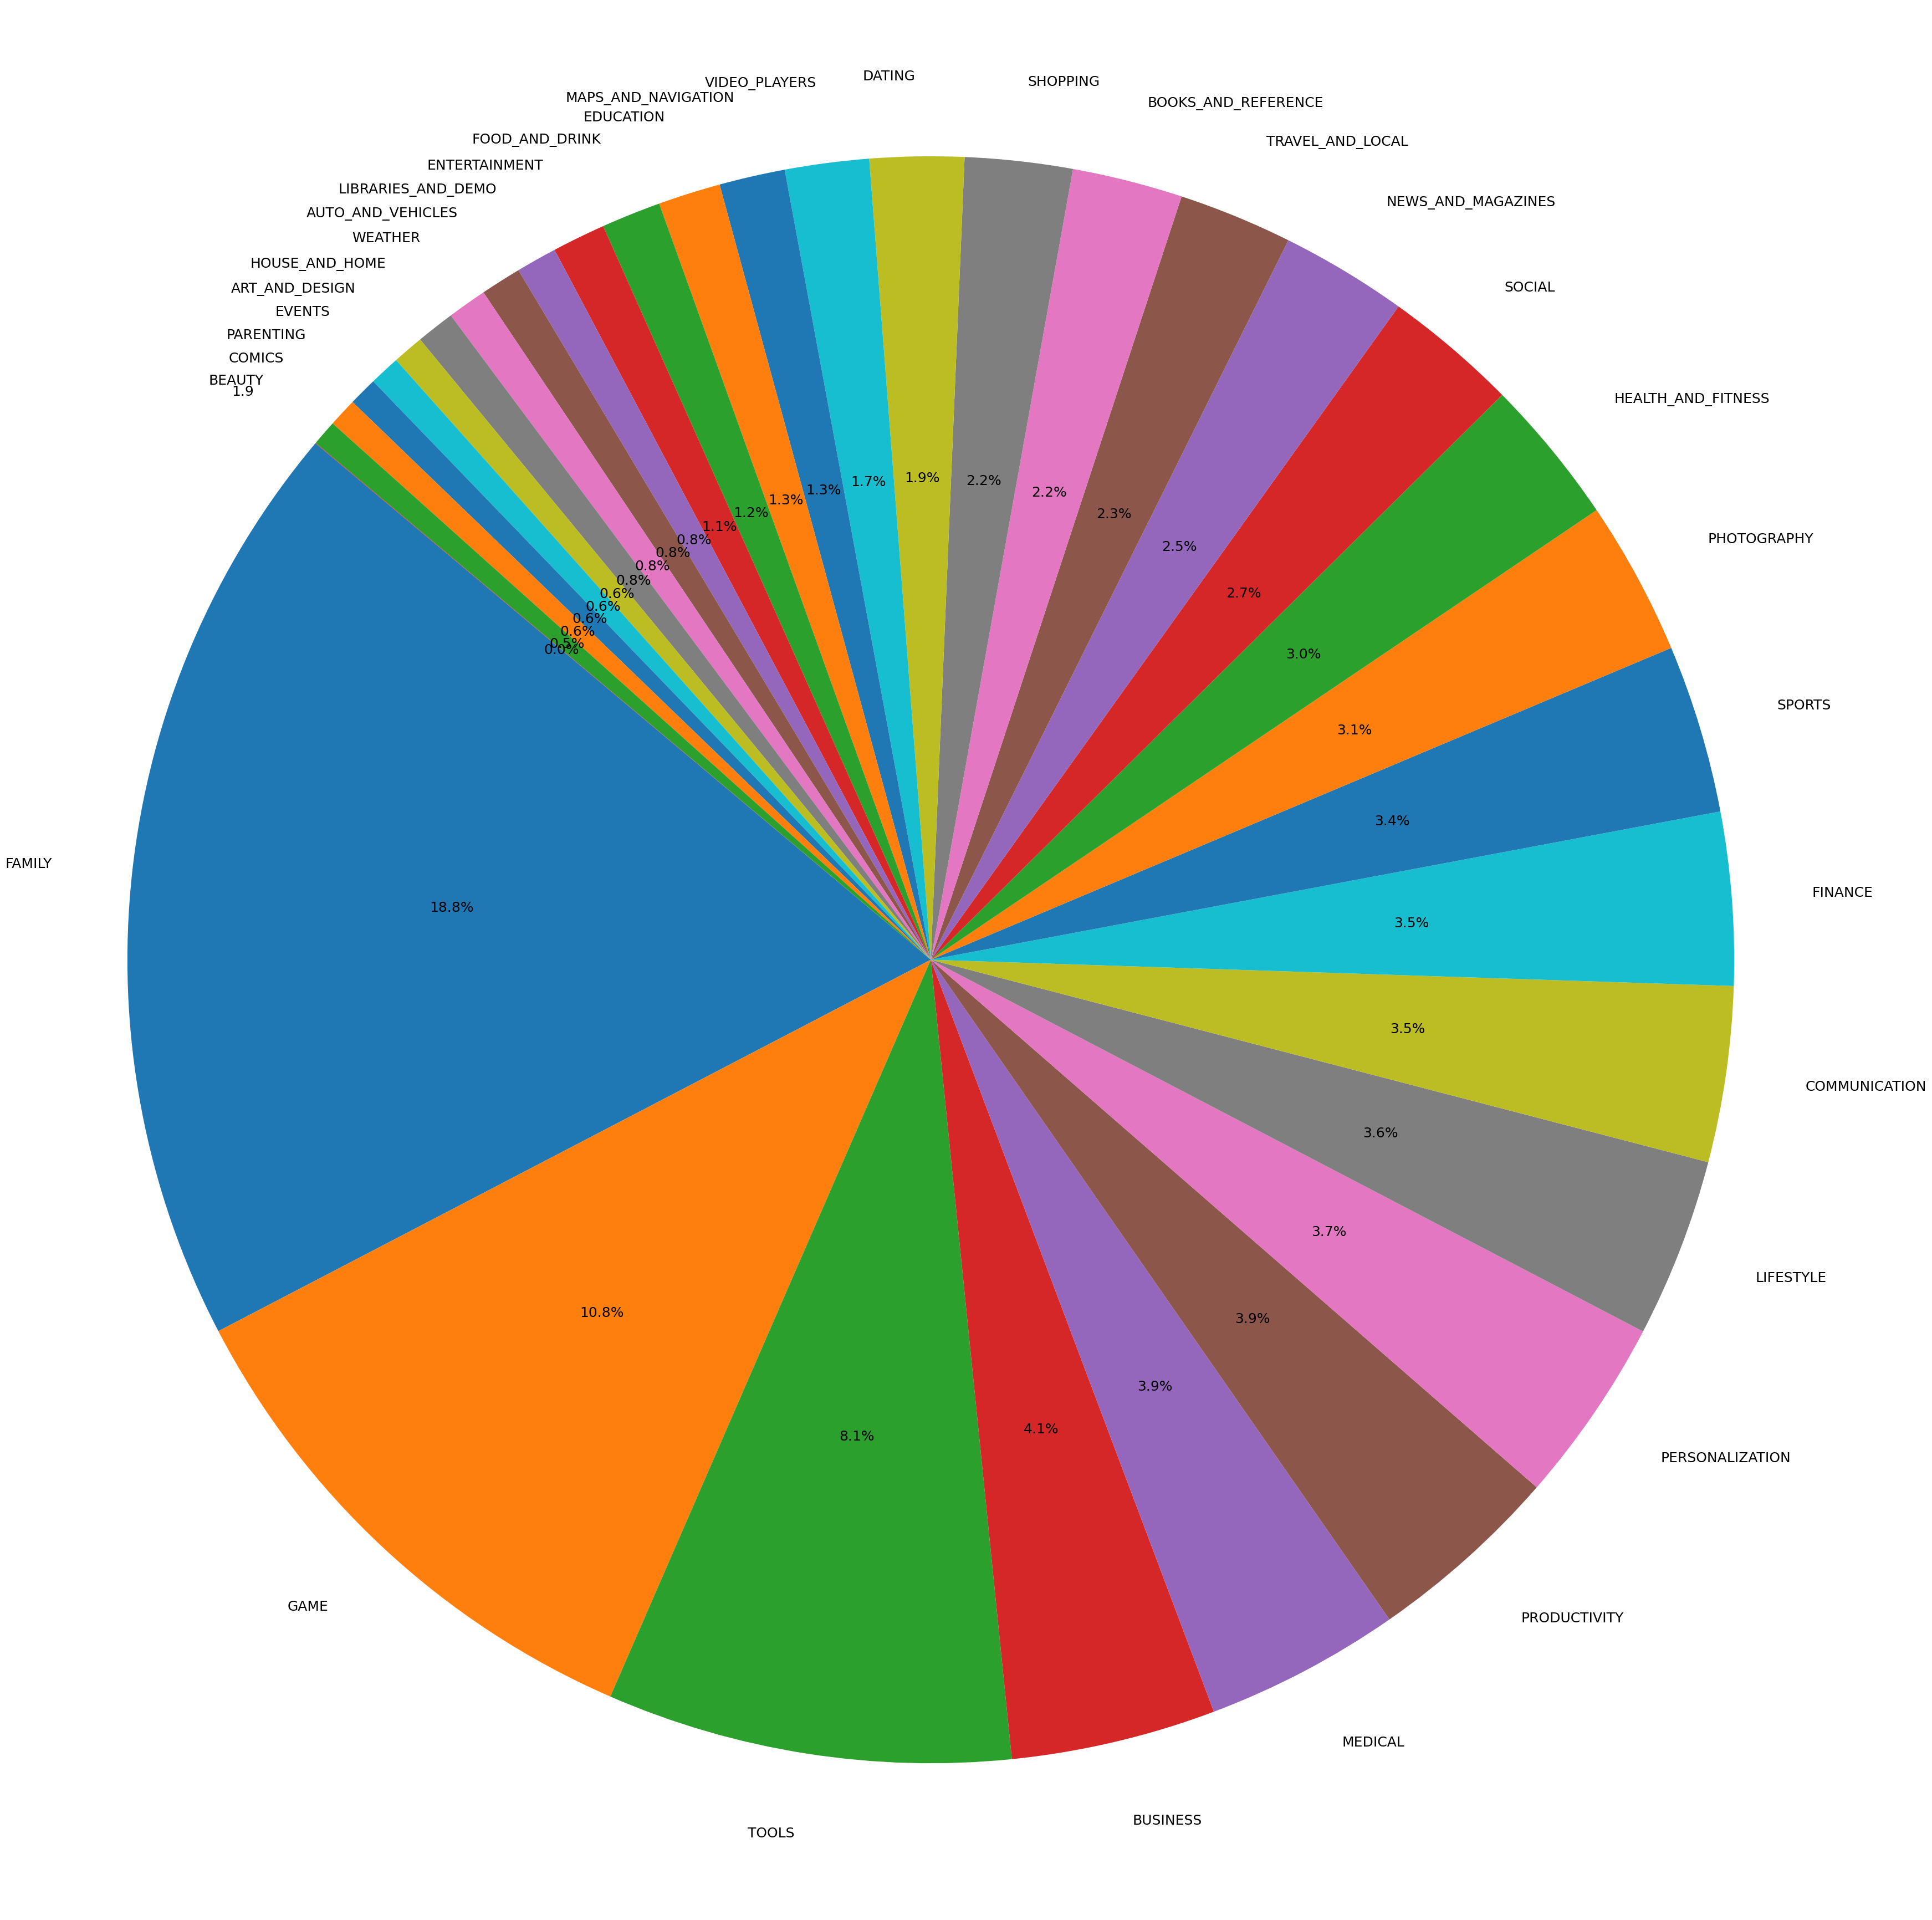

In [5]:
contagem_categori = df['Category'].value_counts()

plt.figure(figsize=(35, 35))
plt.pie(
    contagem_categori,
    labels=contagem_categori.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 18} 
)
plt.axis('equal')
plt.tight_layout()
plt.show()


### Aplicativo mais caro

In [6]:
# Remove o símbolo "$" na coluna 'Price'
df['Price'] = df['Price'].astype(str).str.replace('$', '')

# Garante que a coluna 'Price' é numérica
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Encontra o app mais caro
app_mais_caro = df[['App', 'Price']].loc[df['Price'].idxmax()]

# Imprime resultados
print(f"Nome: {app_mais_caro['App']}")
print(f"Preço: {app_mais_caro['Price']}$")

Nome: I'm Rich - Trump Edition
Preço: 400.0$


### Número de apps classificados como "Mature 17+

In [7]:
num_mature = df['Content Rating'].value_counts().get('Mature 17+', 0)

print(f"Número de apps classificados como 'Mature 17+': {num_mature}")

Número de apps classificados como 'Mature 17+': 447


### Número de reviews dos 10 apps mais avaliados

In [8]:
# Garante que a coluna 'Reviews' é numérica
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Remove apps duplicados
df_sem_duplicados = df.sort_values(by='Reviews', ascending=False).drop_duplicates(subset='App', keep='first')

# Seleciona os 10 apps com mais reviews
dez_app_mais_reviews = df_sem_duplicados[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)

# Imprime resultados
for i, row in dez_app_mais_reviews.iterrows():
    print(f"Nome: {row['App']} | Número de reviews: {int(row['Reviews']):,} \n")

Nome: Facebook | Número de reviews: 78,158,306 

Nome: WhatsApp Messenger | Número de reviews: 69,119,316 

Nome: Instagram | Número de reviews: 66,577,446 

Nome: Messenger – Text and Video Chat for Free | Número de reviews: 56,646,578 

Nome: Clash of Clans | Número de reviews: 44,893,888 

Nome: Clean Master- Space Cleaner & Antivirus | Número de reviews: 42,916,526 

Nome: Subway Surfers | Número de reviews: 27,725,352 

Nome: YouTube | Número de reviews: 25,655,305 

Nome: Security Master - Antivirus, VPN, AppLock, Booster | Número de reviews: 24,900,999 

Nome: Clash Royale | Número de reviews: 23,136,735 



### Média de preço dos apps pagos

In [9]:
apps_pagos = df[df['Type'] == 'Paid']
media_preco = apps_pagos['Price'].mean()
print(f"Média de preço dos apps pagos: {media_preco:.2f}$")

Média de preço dos apps pagos: 13.96$


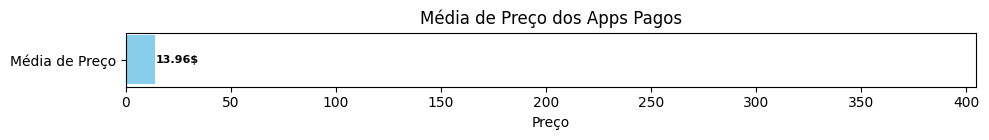

In [10]:
plt.figure(figsize=(10, 1.5))
plt.barh(['Média de Preço'], [media_preco], color='skyblue')
plt.xlim(0, apps_pagos['Price'].max() + 5)
plt.title('Média de Preço dos Apps Pagos')
plt.xlabel('Preço')

# Adiciona o valor da média como texto na barra
plt.text(media_preco + 0.2, 0, f"{media_preco:.2f}$", va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

### 5 categorias com maior número de apps

In [11]:
# Conta número de apps por categoria
apps_por_categoria = df['Category'].value_counts()
cinco_categorias_mais_apps = apps_por_categoria.head(5)

# Imprime resultados
print("5 categorias com mais apps:")
print(cinco_categorias_mais_apps.head(5))

5 categorias com mais apps:
Category
FAMILY      1943
GAME        1121
TOOLS        843
BUSINESS     427
MEDICAL      408
Name: count, dtype: int64


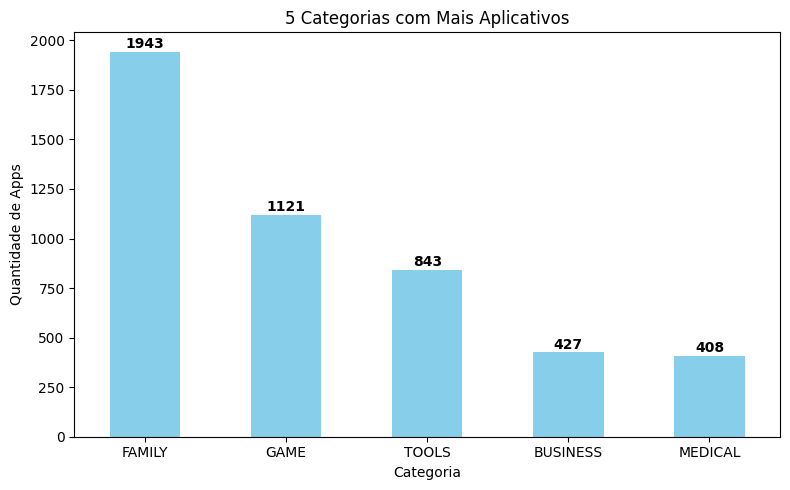

In [12]:
# Cria gráfico de barras
plt.figure(figsize=(8, 5))
cinco_categorias_mais_apps.plot(kind='bar', color='skyblue')

plt.title('5 Categorias com Mais Aplicativos')
plt.ylabel('Quantidade de Apps')
plt.xlabel('Categoria')
plt.xticks(rotation=0)

# Adiciona valores em cima das barras
for i, valor in enumerate(cinco_categorias_mais_apps.values):
    plt.text(i, valor + 2, str(valor), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## Etapa 3

In [13]:
engine = create_engine('sqlite:///apps_google_play.db')
df.to_sql('apps', con=engine, if_exists='replace', index=False)

10358

### Nome e a categoria dos 10 apps mais instalados.

In [14]:
query_a = """
SELECT App, Category
FROM apps
ORDER BY Installs DESC
LIMIT 10
"""
resultado = pd.read_sql_query(query_a, con=engine)
print(resultado)


                                        App             Category
0                         Google Play Books  BOOKS_AND_REFERENCE
1  Messenger – Text and Video Chat for Free        COMMUNICATION
2                        WhatsApp Messenger        COMMUNICATION
3              Google Chrome: Fast & Secure        COMMUNICATION
4                                     Gmail        COMMUNICATION
5                                  Hangouts        COMMUNICATION
6  Messenger – Text and Video Chat for Free        COMMUNICATION
7                                  Hangouts        COMMUNICATION
8             Skype - free IM & video calls        COMMUNICATION
9              Google Chrome: Fast & Secure        COMMUNICATION


### Nome dos apps classificados como Mature 17+

In [15]:
query = """
SELECT App
FROM apps
WHERE `Content Rating` = 'Mature 17+'
"""

# Ler o resultado da consulta em um DataFrame
df_mature = pd.read_sql_query(query, engine)

# Exibir os resultados
print(df_mature) 

                                              App
0             Secrets of beauty, youth and health
1                  Dresses Ideas & Fashions +3000
2                   Lady adviser (beauty, health)
3                               Read books online
4                                         Flybook
..                                            ...
442                                   FP VoiceBot
443               Chat For Strangers - Video Chat
444  Modern Counter Terror Attack – Shooting Game
445     Frim: get new friends on local chat rooms
446                 The SCP Foundation DB fr nn5n

[447 rows x 1 columns]


### Média de reviews por categoria

               Category  media_reviews
0                SOCIAL   1.905632e+06
1         COMMUNICATION   1.642824e+06
2                  GAME   1.262745e+06
3           PHOTOGRAPHY   6.344640e+05
4         VIDEO_PLAYERS   6.307439e+05
5         ENTERTAINMENT   4.285650e+05
6              SHOPPING   4.237998e+05
7                 TOOLS   3.240629e+05
8          PRODUCTIVITY   2.519767e+05
9      TRAVEL_AND_LOCAL   2.344522e+05
10  MAPS_AND_NAVIGATION   2.237902e+05
11               FAMILY   2.042059e+05
12      PERSONALIZATION   1.937968e+05
13               SPORTS   1.861046e+05
14            EDUCATION   1.781962e+05
15              WEATHER   1.781065e+05
16   NEWS_AND_MAGAZINES   1.448707e+05
17   HEALTH_AND_FITNESS   1.008013e+05
18  BOOKS_AND_REFERENCE   9.510099e+04
19       FOOD_AND_DRINK   6.186755e+04
20               COMICS   5.638793e+04
21              FINANCE   4.722192e+04
22       HOUSE_AND_HOME   3.493465e+04
23            LIFESTYLE   3.437151e+04
24             BUSINESS  

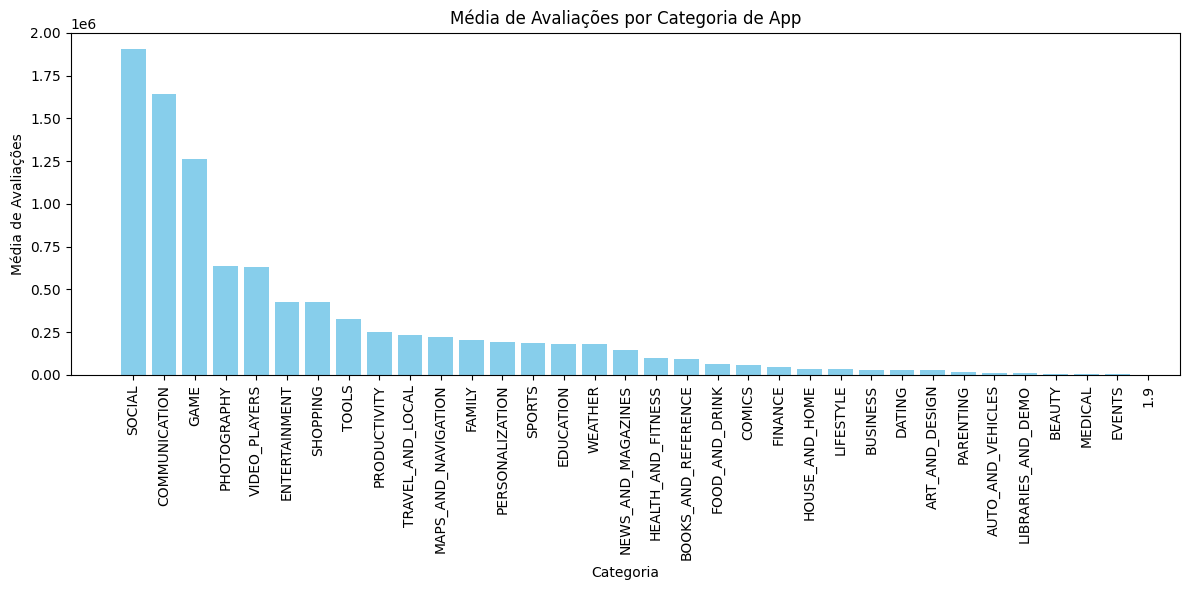

In [16]:
query_c = """
SELECT Category, AVG(Reviews) AS media_reviews
FROM apps
GROUP BY Category
ORDER BY media_reviews DESC
"""
resultado = pd.read_sql_query(query_c, con=engine)
print(resultado)

plt.figure(figsize=(12, 6))
plt.bar(resultado['Category'], resultado['media_reviews'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Média de Avaliações')
plt.title('Média de Avaliações por Categoria de App')
plt.tight_layout()
plt.show()


### Apps com preço maior que 20$

                                                  App   Price
0                            I'm Rich - Trump Edition  400.00
1                              most expensive app (H)  399.99
2                                          💎 I'm rich  399.99
3                                           I am rich  399.99
4                                      I am Rich Plus  399.99
5                                   I Am Rich Premium  399.99
6                                          I am Rich!  399.99
7                                  I am rich(premium)  399.99
8                                       I Am Rich Pro  399.99
9                      I am rich (Most expensive app)  399.99
10                                          I am Rich  399.99
11                                 I AM RICH PRO PLUS  399.99
12                  I'm Rich/Eu sou Rico/أنا غني/我很有錢  399.99
13                                        Eu Sou Rico  394.99
14                                          I Am Rich  389.99
15      

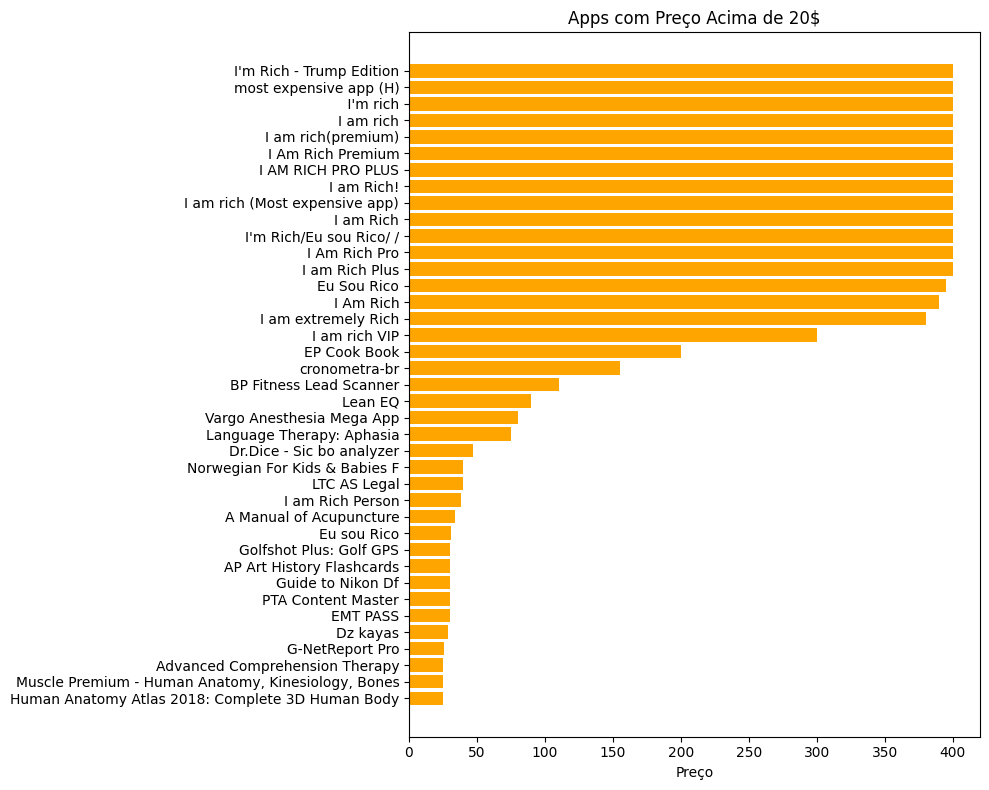

In [18]:
# Remover caracteres não-ASCII dos nomes dos apps


query_d = """
SELECT App, Price
FROM apps
WHERE Price > 20
ORDER BY Price DESC
"""
resultado = pd.read_sql_query(query_d, con=engine)
print(resultado)

resultado = resultado.sort_values(by='Price', ascending=True)
resultado['App'] = resultado['App'].str.encode('ascii', 'ignore').str.decode('ascii')

plt.figure(figsize=(10, 8))
plt.barh(resultado['App'], resultado['Price'], color='orange')
plt.xlabel('Preço')
plt.title('Apps com Preço Acima de 20$')
plt.tight_layout()
plt.show()
